In [1]:
# Import Necessa

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform

import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

plt.rcParams['figure.figsize'] = (10,6)
plt.rcParams['figure.dpi'] = 300
sns.set_style('darkgrid')

In [2]:
df = pd.read_csv("/user/HS400/sb03414/mlmavericks_coursework/data/processed/preprocessed_incident_event_scaled_svm_mlp.csv")
df

,reassignment_count,reopen_count,sys_mod_count,impact,knowledge,u_priority_confirmation,opened_month,opened_weekend,hour_sin,hour_cos,...,incident_state_Awaiting Vendor,incident_state_Closed,incident_state_New,incident_state_Resolved,notify_Send Email,contact_type_Email,contact_type_IVR,contact_type_Phone,contact_type_Self service,time_to_resolution_log
0,-0.875772,-0.10573,-1.016534,-0.012218,2.141764,-0.637754,-1.909515,-0.212074,0.359122,2.188189,...,-0.070811,-0.462661,1.700677,-0.471249,-0.028991,-0.039432,-0.011271,0.094337,-0.08409,2.417401
1,-0.875772,-0.10573,-0.533365,-0.012218,2.141764,-0.637754,-1.909515,-0.212074,0.359122,2.188189,...,-0.070811,-0.462661,-0.588001,2.122020,-0.028991,-0.039432,-0.011271,0.094337,-0.08409,2.417401
2,-0.875772,-0.10573,-0.291780,-0.012218,2.141764,-0.637754,-1.909515,-0.212074,0.359122,2.188189,...,-0.070811,-0.462661,-0.588001,2.122020,-0.028991,-0.039432,-0.011271,0.094337,-0.08409,2.417401
3,-0.875772,-0.10573,-0.050196,-0.012218,2.141764,-0.637754,-1.909515,-0.212074,0.359122,2.188189,...,-0.070811,2.161408,-0.588001,-0.471249,-0.028991,-0.039432,-0.011271,0.094337,-0.08409,2.417401
4,-0.875772,-0.10573,-1.016534,-0.012218,2.141764,-0.637754,-1.909515,-0.212074,1.288006,2.188189,...,-0.070811,-0.462661,1.700677,-0.471249,-0.028991,-0.039432,-0.011271,0.094337,-0.08409,3.407842
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
141702,0.190566,-0.10573,-0.050196,-0.012218,-0.466905,1.568002,-1.909515,-0.212074,1.044898,-0.178893,...,-0.070811,2.161408,-0.588001,-0.471249,-0.028991,25.359864,-0.011271,-10.600264,-0.08409,0.550046
141703,-0.875772,-0.10573,-1.016534,-0.012218,-0.466905,-0.637754,-1.909515,-0.212074,-0.801695,-0.676381,...,-0.070811,-0.462661,-0.588001,-0.471249,-0.028991,25.359864,-0.011271,-10.600264,-0.08409,1.208960
141704,0.190566,-0.10573,-0.774949,-0.012218,-0.466905,-0.637754,-1.909515,-0.212074,-0.801695,-0.676381,...,-0.070811,-0.462661,-0.588001,-0.471249,-0.028991,25.359864,-0.011271,-10.600264,-0.08409,1.208960
141705,0.190566,-0.10573,-0.533365,-0.012218,-0.466905,1.568002,-1.909515,-0.212074,-0.801695,-0.676381,...,-0.070811,-0.462661,-0.588001,2.122020,-0.028991,25.359864,-0.011271,-10.600264,-0.08409,1.208960


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 141707 entries, 0 to 141706
Data columns (total 37 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   reassignment_count                 141707 non-null  float64
 1   reopen_count                       141707 non-null  float64
 2   sys_mod_count                      141707 non-null  float64
 3   impact                             141707 non-null  float64
 4   knowledge                          141707 non-null  float64
 5   u_priority_confirmation            141707 non-null  float64
 6   opened_month                       141707 non-null  float64
 7   opened_weekend                     141707 non-null  float64
 8   hour_sin                           141707 non-null  float64
 9   hour_cos                           141707 non-null  float64
 10  day_sin                            141707 non-null  float64
 11  day_cos                            1417

In [4]:
df.isna().sum()

reassignment_count                      0
reopen_count                            0
sys_mod_count                           0
impact                                  0
knowledge                               0
u_priority_confirmation                 0
opened_month                            0
opened_weekend                          0
hour_sin                                0
hour_cos                                0
day_sin                                 0
day_cos                                 0
number_freq                             0
caller_id_freq                          0
assigned_to_freq                        0
opened_by_freq                          0
resolved_by_freq                        0
u_symptom_freq                          0
closed_code_freq                        0
location_freq                           0
category_freq                           0
subcategory_freq                        0
assignment_group_freq                   0
urgency_priority_score            

In [5]:
df.describe()

,reassignment_count,reopen_count,sys_mod_count,impact,knowledge,u_priority_confirmation,opened_month,opened_weekend,hour_sin,hour_cos,...,incident_state_Awaiting Vendor,incident_state_Closed,incident_state_New,incident_state_Resolved,notify_Send Email,contact_type_Email,contact_type_IVR,contact_type_Phone,contact_type_Self service,time_to_resolution_log
count,1.417070e+05,1.417070e+05,1.417070e+05,1.417070e+05,1.417070e+05,1.417070e+05,1.417070e+05,1.417070e+05,1.417070e+05,1.417070e+05,...,1.417070e+05,1.417070e+05,1.417070e+05,1.417070e+05,1.417070e+05,1.417070e+05,1.417070e+05,1.417070e+05,1.417070e+05,138566.000000
mean,5.294962e-17,1.604534e-18,-7.140176e-17,-7.998601e-16,8.022669e-17,6.739042e-17,9.627203e-17,2.206234e-17,-3.369521e-17,5.535642e-17,...,7.862216e-17,-4.763460e-18,4.813601e-17,7.452308e-17,4.994112e-17,2.246347e-17,8.183123e-17,-2.823980e-16,6.418135e-17,3.787230
std,1.000004e+00,1.000004e+00,1.000004e+00,1.000004e+00,1.000004e+00,1.000004e+00,1.000004e+00,1.000004e+00,1.000004e+00,1.000004e+00,...,1.000004e+00,1.000004e+00,1.000004e+00,1.000004e+00,1.000004e+00,1.000004e+00,1.000004e+00,1.000004e+00,1.000004e+00,2.292373
min,-8.757723e-01,-1.057304e-01,-1.016534e+00,-4.395386e+00,-4.669048e-01,-6.377543e-01,-2.934223e+00,-2.120736e-01,-1.566579e+00,-1.095783e+00,...,-7.081091e-02,-4.626615e-01,-5.880013e-01,-4.712490e-01,-2.899080e-02,-3.943239e-02,-1.127115e-02,-1.060026e+01,-8.409031e-02,0.000000
25%,-8.757723e-01,-1.057304e-01,-7.749494e-01,-1.221783e-02,-4.669048e-01,-6.377543e-01,-8.848067e-01,-2.120736e-01,-1.118520e+00,-6.763812e-01,...,-7.081091e-02,-4.626615e-01,-5.880013e-01,-4.712490e-01,-2.899080e-02,-3.943239e-02,-1.127115e-02,9.433727e-02,-8.409031e-02,1.622683
50%,1.905655e-01,-1.057304e-01,-2.917803e-01,-1.221783e-02,-4.669048e-01,-6.377543e-01,1.399016e-01,-2.120736e-01,3.591216e-01,-1.788927e-01,...,-7.081091e-02,-4.626615e-01,-5.880013e-01,-4.712490e-01,-2.899080e-02,-3.943239e-02,-1.127115e-02,9.433727e-02,-8.409031e-02,4.311023
75%,1.905655e-01,-1.057304e-01,4.329733e-01,-1.221783e-02,-4.669048e-01,1.568002e+00,1.164610e+00,-2.120736e-01,1.044898e+00,4.694469e-01,...,-7.081091e-02,-4.626615e-01,1.700677e+00,-4.712490e-01,-2.899080e-02,-3.943239e-02,-1.127115e-02,9.433727e-02,-8.409031e-02,5.572851
max,1.790072e+00,3.848472e+01,2.244857e+00,4.370951e+00,2.141764e+00,1.568002e+00,8.337567e+00,4.715344e+00,1.492956e+00,2.188189e+00,...,1.412212e+01,2.161408e+00,1.700677e+00,2.122020e+00,3.449370e+01,2.535986e+01,8.872210e+01,9.433727e-02,1.189198e+01,8.996053


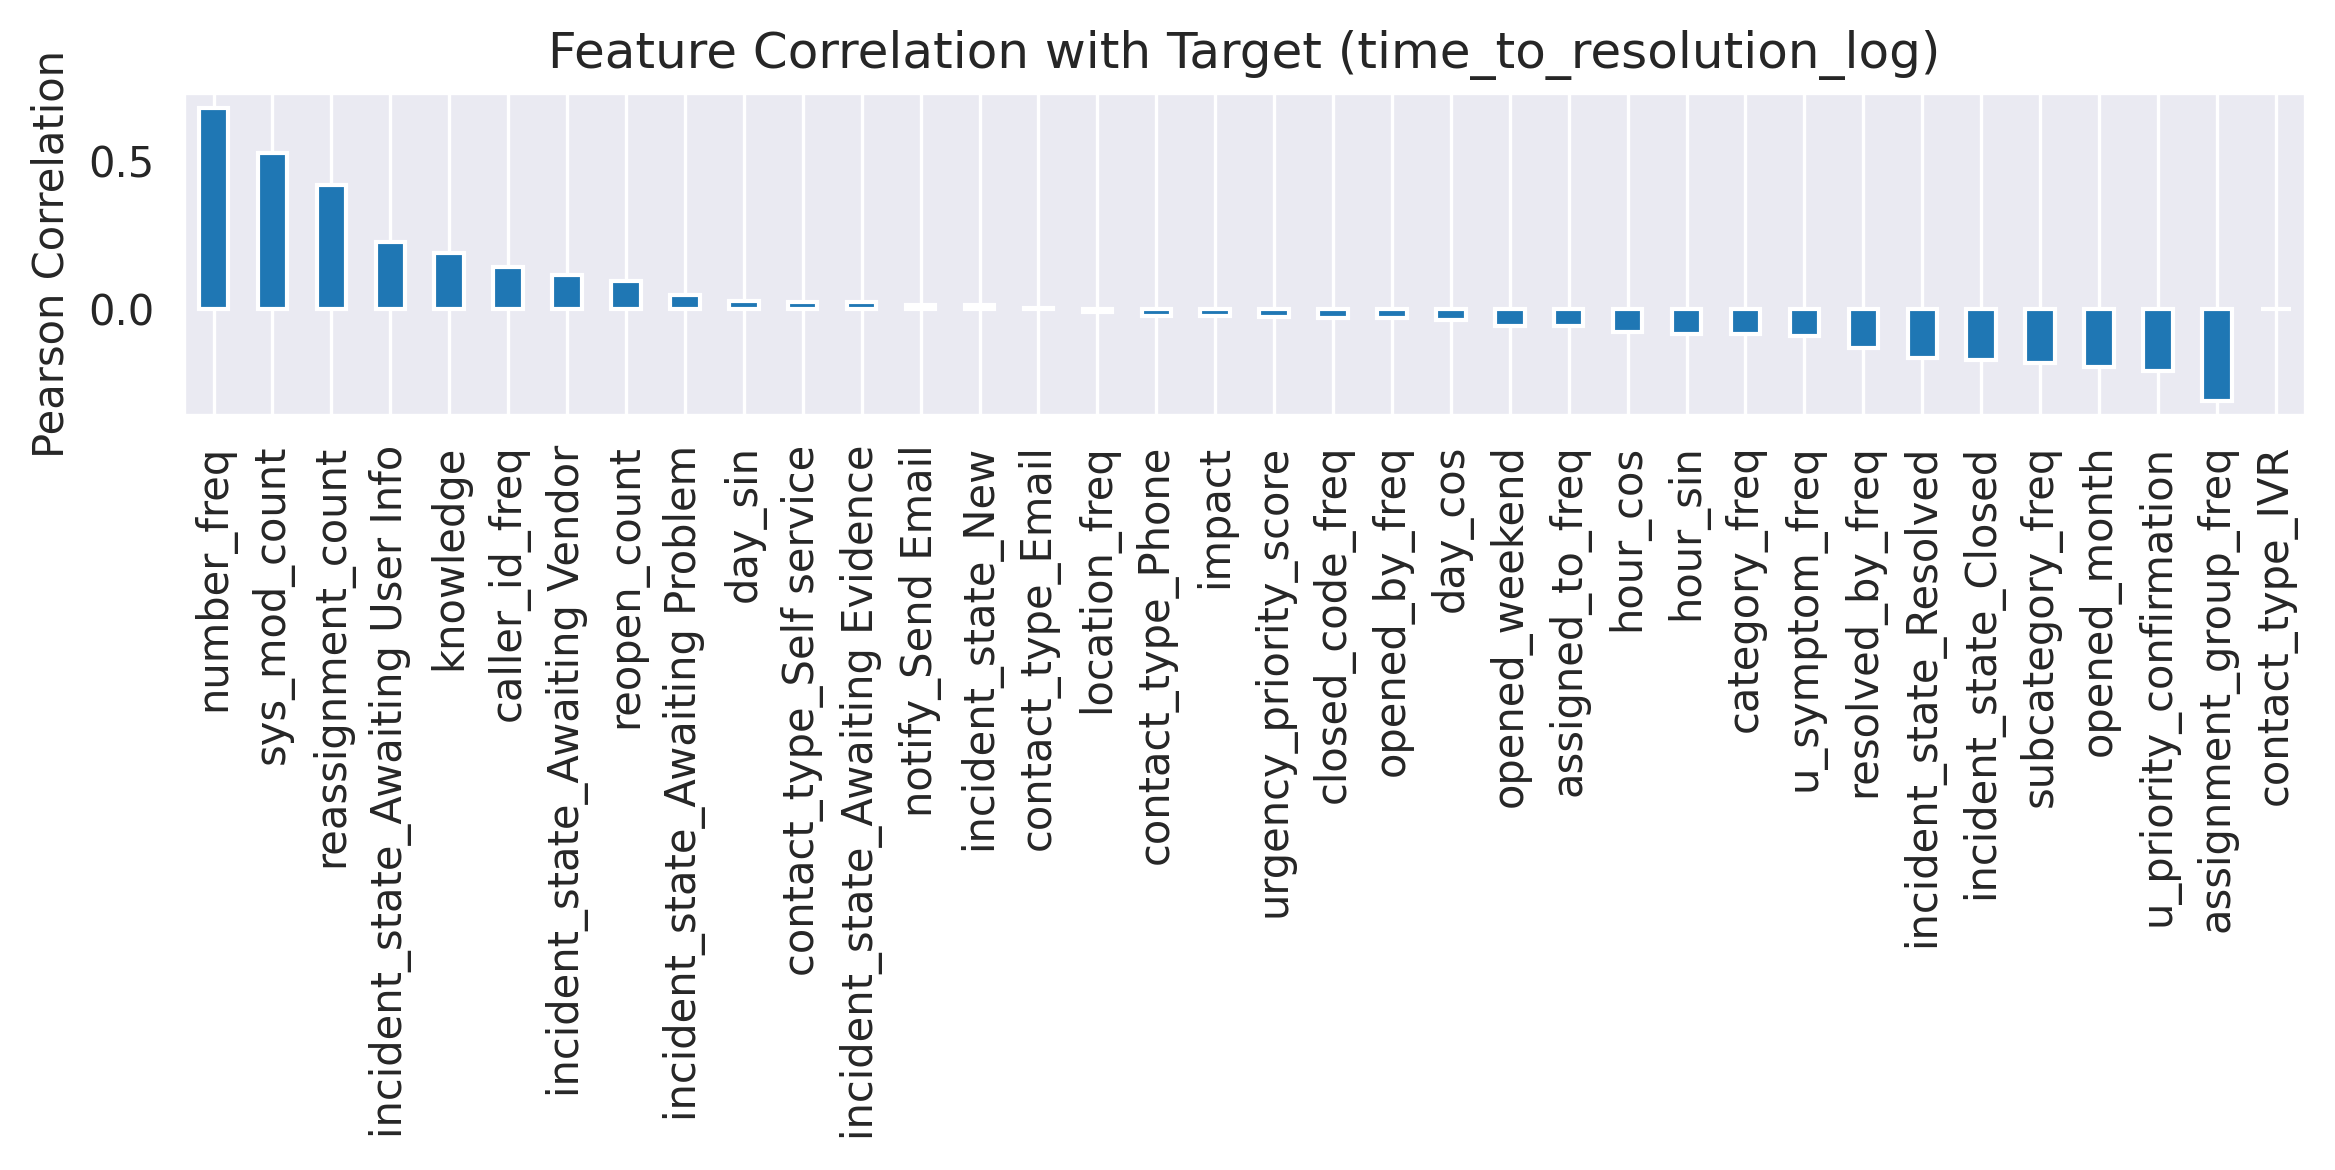

In [23]:
# Numeric correlation matrix
numeric_df = df.select_dtypes(include=[np.number])
corr_matrix = numeric_df.corr()

# Correlation with target only
target_corr = corr_matrix["time_to_resolution_log"].drop("time_to_resolution_log")

# Visualize correlations
plt.figure(figsize=(8,4))
target_corr.sort_values(ascending=False).plot(kind='bar')
plt.title("Feature Correlation with Target (time_to_resolution_log)")
plt.ylabel("Pearson Correlation")
plt.grid(axis='y')
plt.tight_layout()
plt.show()

-  These features exhibit moderate to strong positive linear correlation, meaning as these values increase, so does the time to resolution (in log scale). These were selected as core features for the SVR model.

In [7]:
# Recalculate target correlation
target_corr = df.corr()["time_to_resolution_log"].drop("time_to_resolution_log")

# Select only features with |correlation| > 0.1
selected_features = target_corr[abs(target_corr) > 0.1].index.tolist()

# Reduced dataset
X = df[selected_features]
y = df["time_to_resolution_log"]

print("Selected features for SVR:", selected_features)

Selected features for SVR: ['reassignment_count', 'sys_mod_count', 'knowledge', 'u_priority_confirmation', 'opened_month', 'number_freq', 'caller_id_freq', 'resolved_by_freq', 'subcategory_freq', 'assignment_group_freq', 'incident_state_Awaiting User Info', 'incident_state_Awaiting Vendor', 'incident_state_Closed', 'incident_state_Resolved']


-  A correlation-based feature filtering was performed using Pearson correlation with the target. We retained features with absolute correlation > 0.1, resulting in a compact and informative set of 8–15 features.

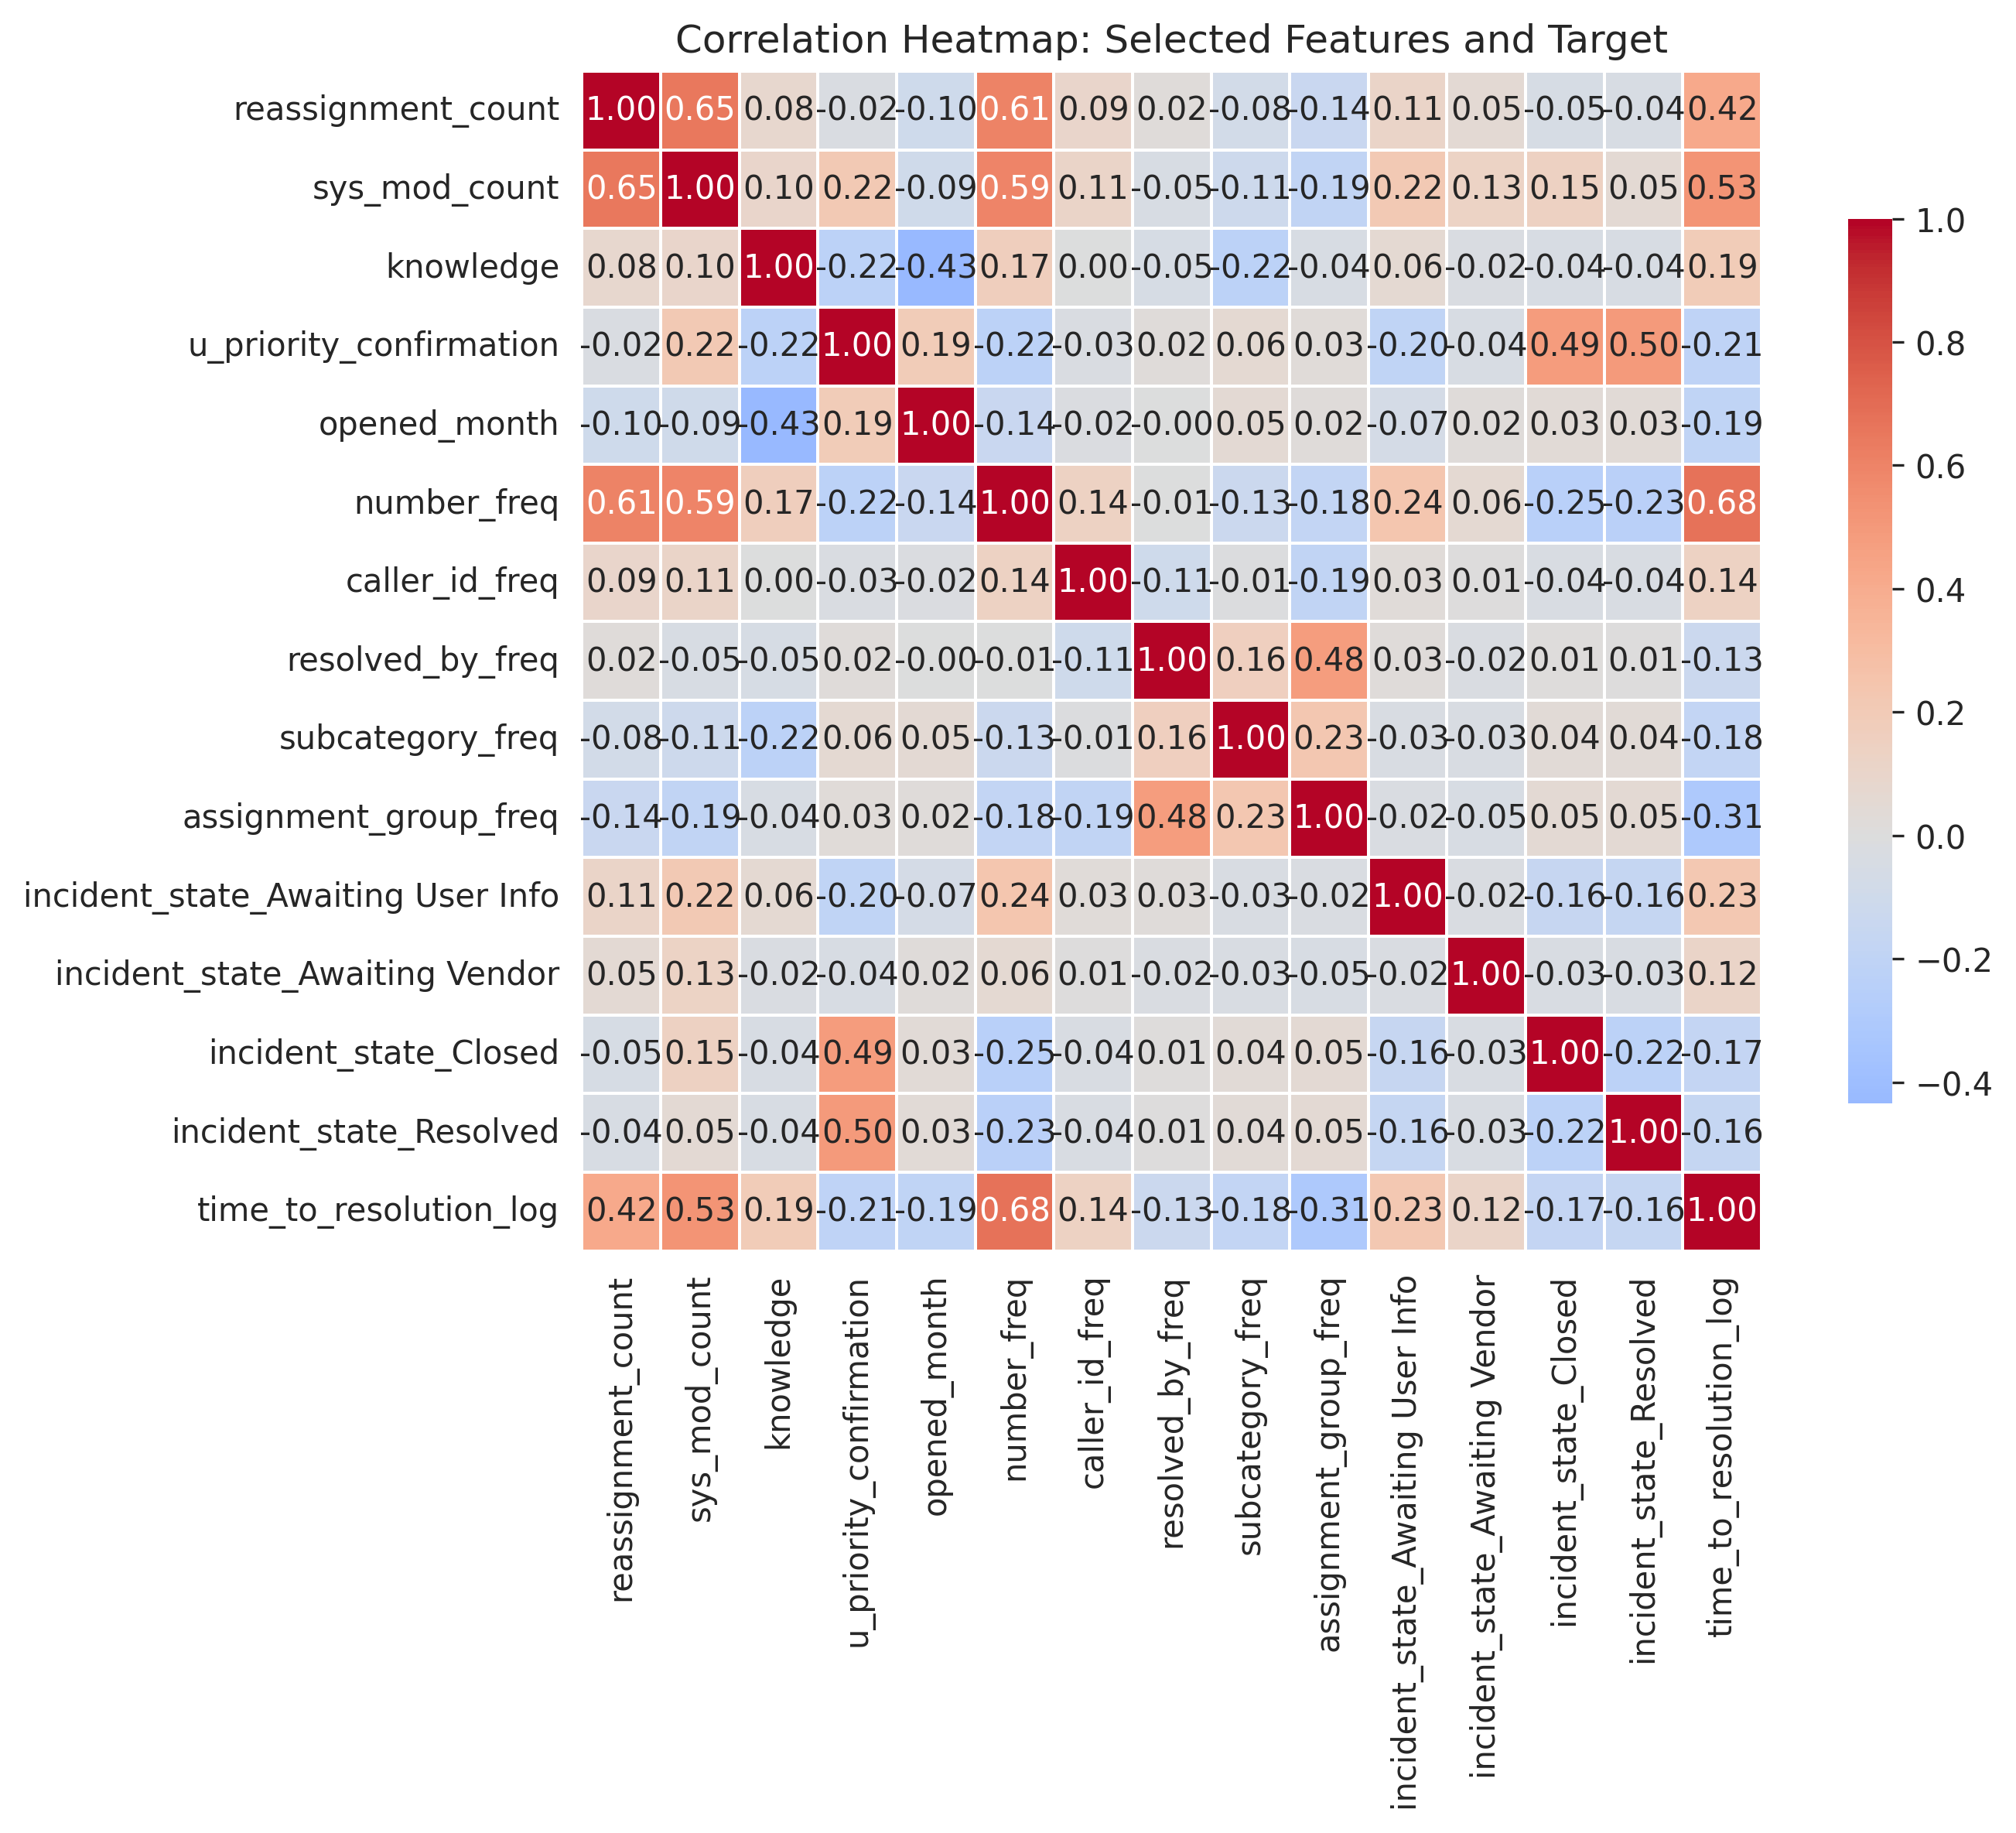

In [26]:
# Filter the dataset for selected features
selected_df = df[selected_features + ["time_to_resolution_log"]]

# Compute correlation matrix
selected_corr = selected_df.corr()

# Plot the heatmap
plt.figure(figsize=(10,8))
sns.heatmap(
    selected_corr,
    annot=True,
    fmt=".2f",
    cmap="coolwarm",
    center=0,
    square=True,
    linewidths=0.5,
    cbar_kws={"shrink": 0.75}
)
plt.title("Correlation Heatmap: Selected Features and Target")
plt.tight_layout()
plt.show()

In [9]:
# Drop rows where target is NaN
df = df.dropna(subset=["time_to_resolution_log"])

# Train-test split using selected features
X = df[selected_features]
y = df["time_to_resolution_log"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Confirm the shapes
print(f"Training samples: {X_train.shape[0]}")
print(f"Testing samples: {X_test.shape[0]}")

Training samples: 110852
Testing samples: 27714


In [17]:
!pip install progressbar2

Defaulting to user installation because normal site-packages is not writeable
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.1/57.1 KB 1.4 MB/s eta 0:00:00
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.


In [19]:
import progressbar
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform
from joblib import Parallel, delayed

# Define the pipeline
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('svr', SVR())
])

# Define hyperparameter search space
param_dist = {
    'svr__C': uniform(0.1, 10),               # Regularization strength
    'svr__epsilon': uniform(0.01, 1),         # Epsilon-insensitive tube width
    'svr__kernel': ['rbf', 'linear'],         # RBF for non-linear, linear for simple
    'svr__gamma': ['scale', 'auto']           # Gamma for RBF kernel
}

# Setup RandomizedSearchCV
random_search = RandomizedSearchCV(
    estimator=pipeline,
    param_distributions=param_dist,
    n_iter=10,
    cv=3,
    scoring='r2',
    n_jobs=-1,
    verbose=0,
    random_state=42
)

# Create a custom joblib wrapper for progress bar
class ProgressBarJoblib:
    def __init__(self, progress_bar):
        self.progress_bar = progress_bar

    def __call__(self, *args, **kwargs):
        return self

    def __enter__(self):
        self.original_parallel_call = Parallel.__call__

        def parallel_call(*args, **kwargs):
            self.progress_bar.update(1)  # Update the progress bar
            return self.original_parallel_call(*args, **kwargs)

        Parallel.__call__ = parallel_call

    def __exit__(self, exc_type, exc_val, exc_tb):
        Parallel.__call__ = self.original_parallel_call
        self.progress_bar.finish()  # Finish the progress bar after job is done

# Initialize progress bar
total_iterations = random_search.n_iter * 3  # Total iterations = n_iter * folds (3)
bar = progressbar.ProgressBar(maxval=total_iterations, widgets=[
    ' [', progressbar.Percentage(), '] ',
    progressbar.Bar(), ' ', progressbar.ETA()
]).start()

# Perform RandomizedSearchCV and wrap with ProgressBarJoblib
with ProgressBarJoblib(bar):
    random_search.fit(X_train, y_train)  # Fit the model with training data

bar.finish()  # Finish and display the progress bar after the fitting is done

 [100%] |######################################################| Time:  0:56:35
 [100%] |######################################################| Time:  0:56:35

In [22]:
from sklearn.metrics import mean_absolute_error, root_mean_squared_error, r2_score

y_pred = random_search.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
rmse = root_mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"R2 Score: {r2:.4f}")

Mean Absolute Error (MAE): 0.9029
Root Mean Squared Error (RMSE): 1.2412
R2 Score: 0.7055


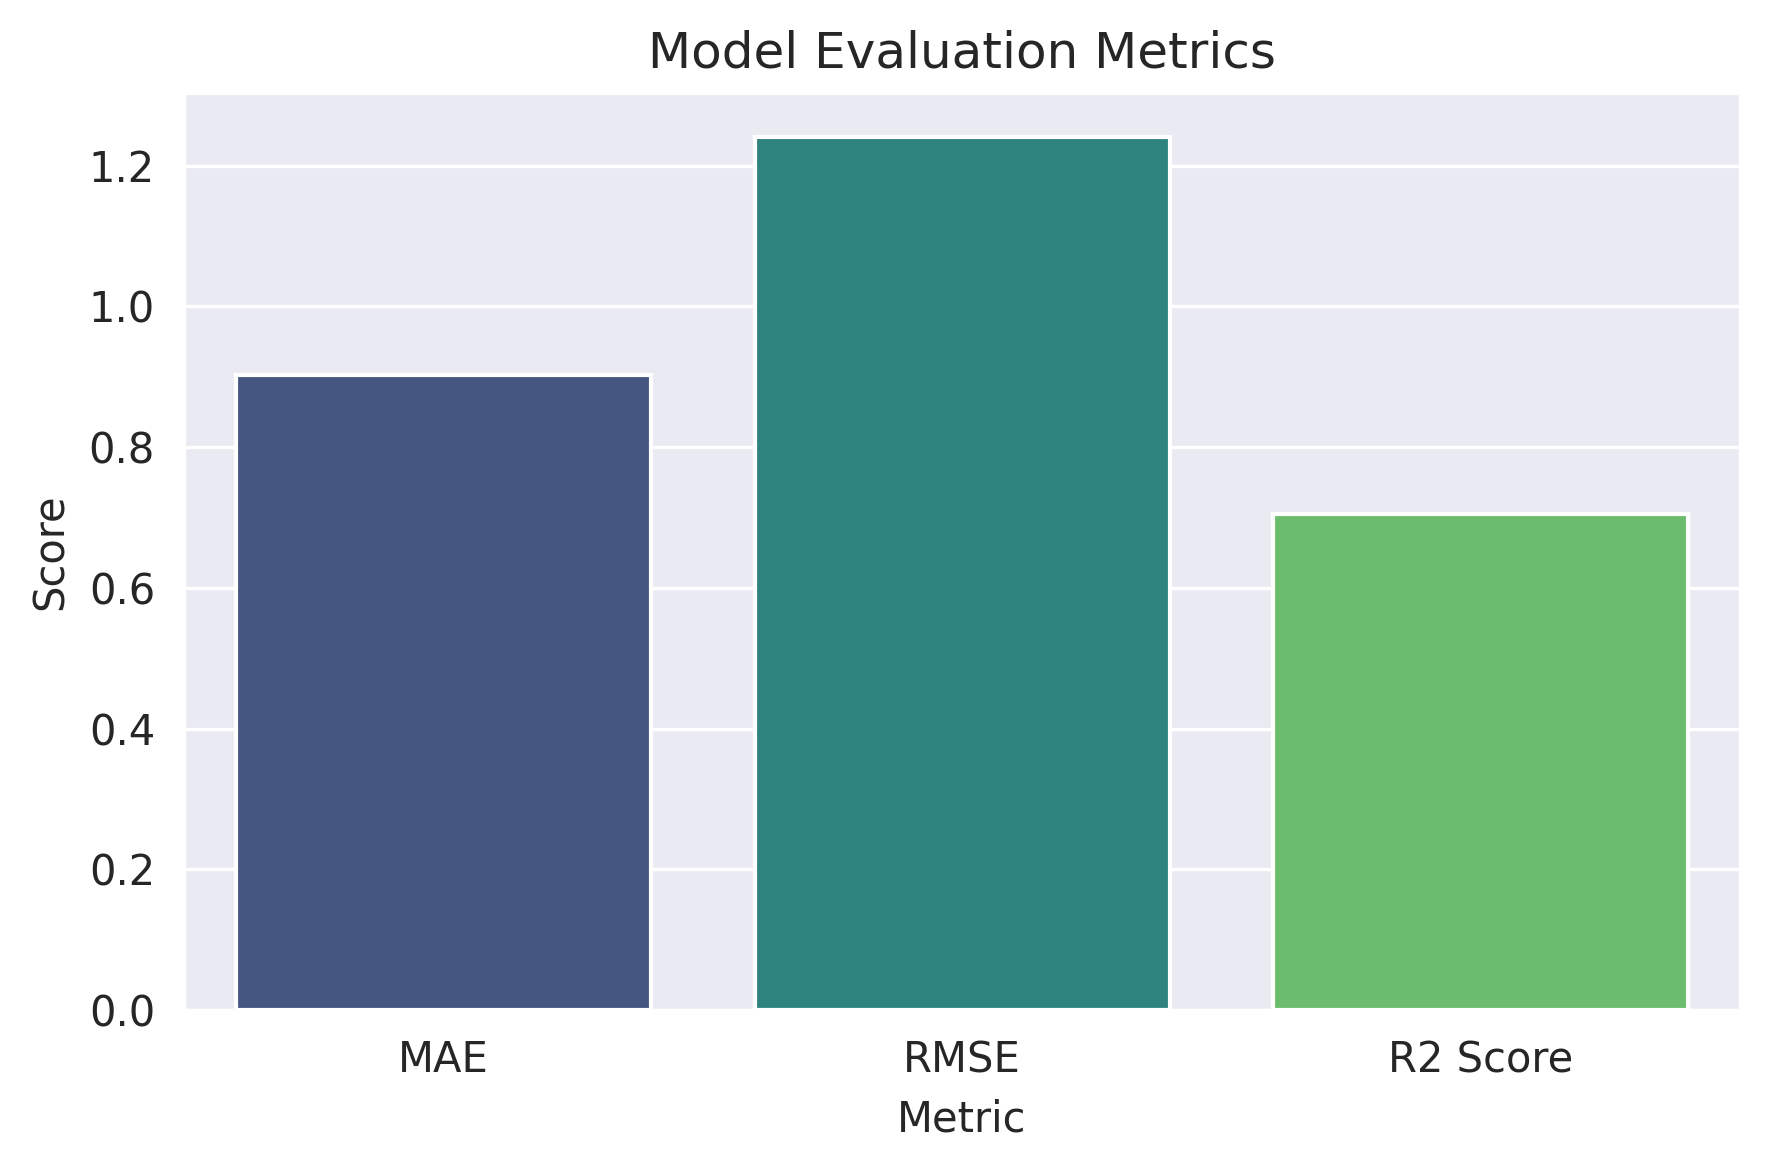

In [30]:
# Plotting MAE, RMSE, and R2 scores
metrics = {'MAE': mae, 'RMSE': rmse, 'R2 Score': r2}

# Create a bar plot for the performance metrics
plt.figure(figsize=(6, 4))
sns.barplot(x=list(metrics.keys()), y=list(metrics.values()), palette='viridis')
plt.title('Model Evaluation Metrics')
plt.ylabel('Score')
plt.xlabel('Metric')
plt.tight_layout()
plt.show()

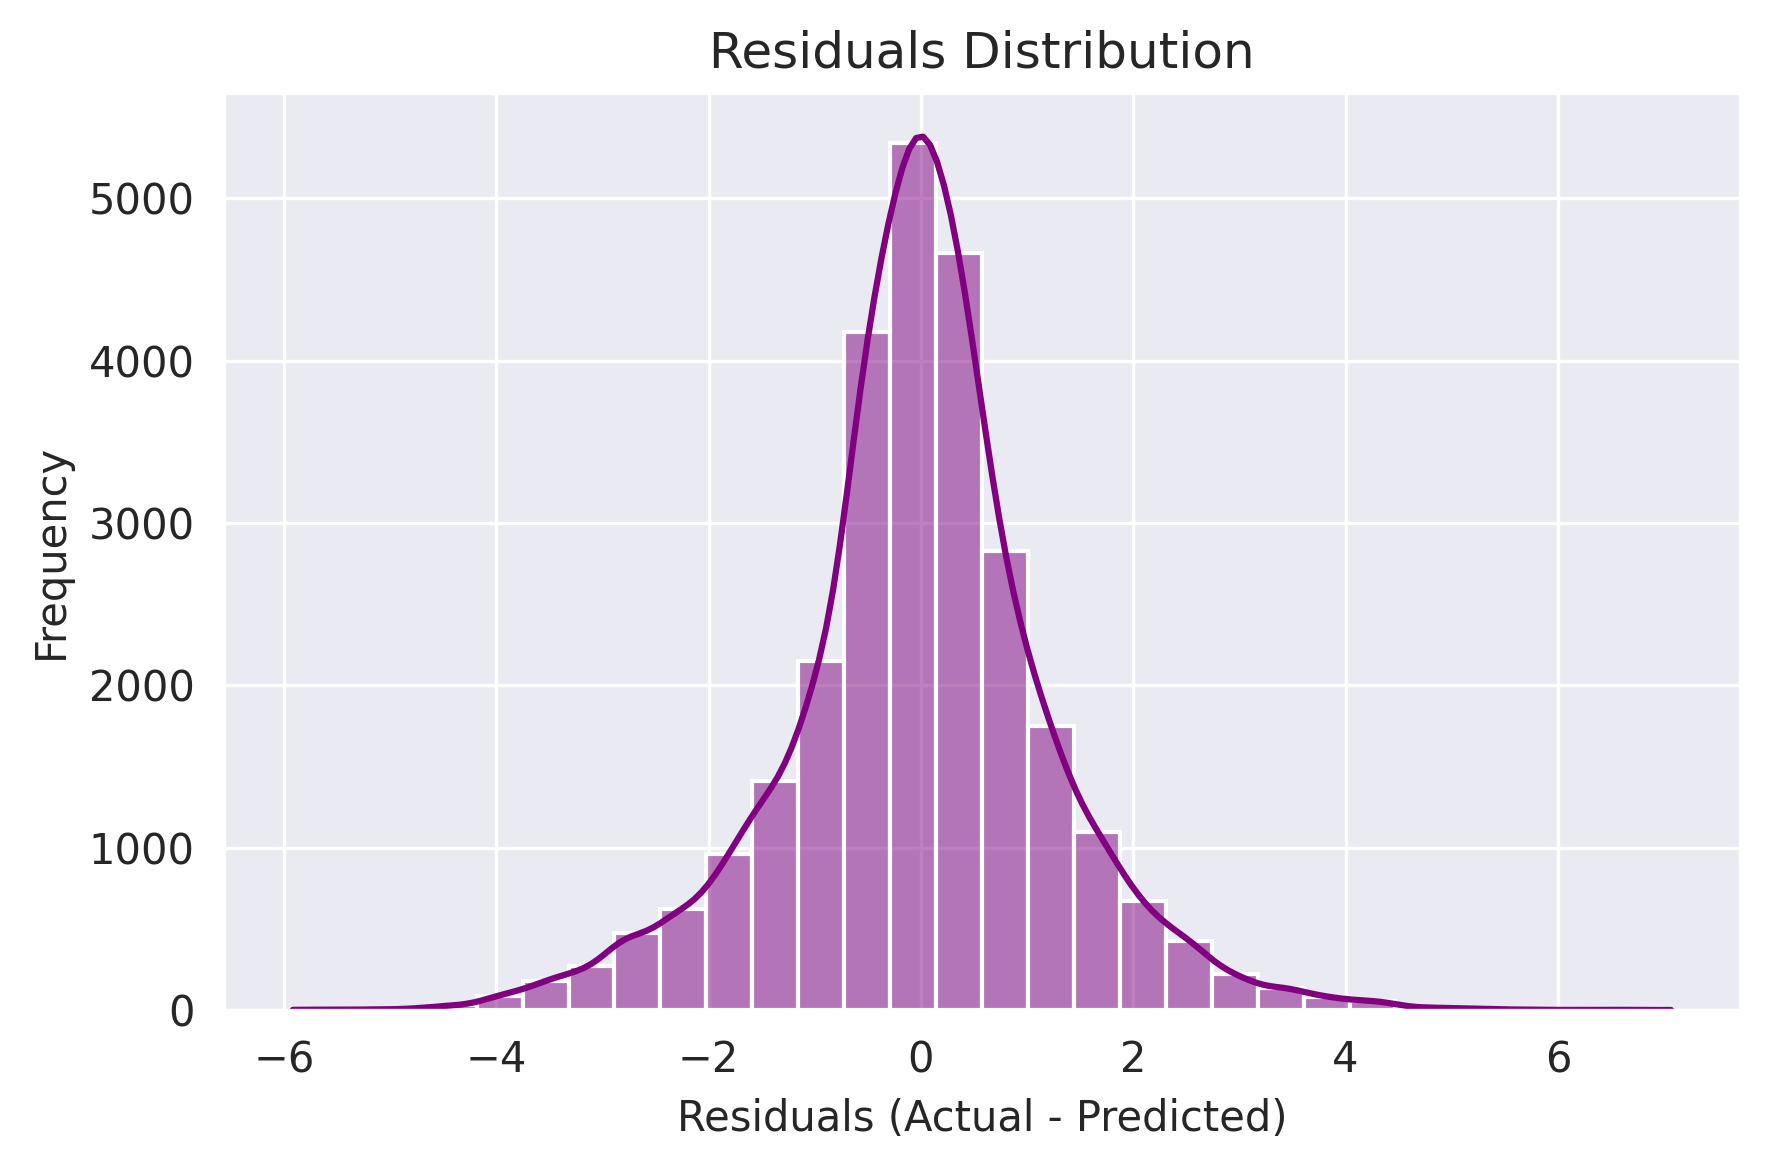

In [32]:
# Residuals plot (difference between actual and predicted)
residuals = y_test - y_pred

plt.figure(figsize=(6, 4))
sns.histplot(residuals, bins=30, kde=True, color='purple')
plt.title('Residuals Distribution')
plt.xlabel('Residuals (Actual - Predicted)')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

In [33]:
# Save the best estimator from RandomizedSearchCV

import joblib
joblib.dump(random_search.best_estimator_, '../../models/svr_large_data_best.pkl')

['../../models/svr_large_data_best.pkl']

### Conclusion

-  This experiment demonstrates the effectiveness of Support Vector Regression in modeling time-to-resolution for IT incidents. Despite using fewer features than a prior MLP model, the SVR achieved comparable performance with:

High R² score (~0.7055)

Low average prediction error

Better interpretability

Fewer hyperparameters

Robust performance even with simpler feature sets